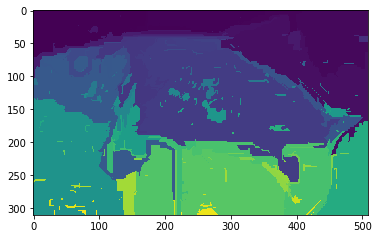

204
405
122 144 71 75
399 0 109 101
119 131 74 88
46 54 60 64
378 198 74 112
398 0 110 101
0 134 172 176
113 96 134 214
113 131 80 115
10 41 269 145
87 41 192 145
223 184 250 126
257 8 251 211
155 43 310 217
0 134 138 176
0 0 508 310
154 205 59 105
0 0 171 104
241 198 211 112
0 0 171 113
113 131 107 115
347 198 105 112
223 62 277 248
155 0 353 310
241 184 232 126
0 68 237 242
0 68 247 242
285 8 223 211
257 0 251 219
223 207 160 103
113 96 107 150
431 169 77 141
0 41 279 269
0 68 237 220
155 43 345 267
46 41 233 145
302 62 198 139
0 68 214 220


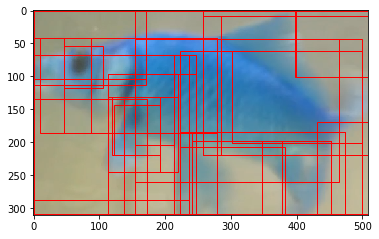

In [133]:
from __future__ import (
    division,
    print_function,
)

import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch
import numpy as np
import cv2 as cv
import skimage
def main():
    # 加载图片数据
    img = cv.imread('2.jpg')
    '''
    执行selective search，regions格式如下
    [
                {
                    'rect': (left, top, width, height),
                    'labels': [...],
                    'size': component_size
                },
                ...
    ]
    '''
    
    
    
    img_lbl, regions = selectivesearch.selective_search(
        img, scale=50, sigma=0.9, min_size=5)

    #计算一共分割了多少个原始候选区域
    temp = set()
    for i in range(img_lbl.shape[0]):
        for j in range(img_lbl.shape[1]):    
            temp.add(img_lbl[i,j,3]) 
    print(len(temp))       #286
    
    #计算利用Selective Search算法得到了多少个候选区域
    print(len(regions))    #570
    #创建一个集合 元素不会重复，每一个元素都是一个list(左上角x，左上角y,宽,高)，表示一个候选区域的边框
    candidates = set()
    for r in regions:
        #排除重复的候选区
        if r['rect'] in candidates:
            continue
        #排除小于 2000 pixels的候选区域(并不是bounding box中的区域大小)  
        if r['size'] < 1000:
            continue
        #排除扭曲的候选区域边框  即只保留近似正方形的
        x, y, w, h = r['rect']
        if w / h > 2 or h / w > 2:
            continue
        candidates.add(r['rect'])

    #在原始图像上绘制候选区域边框
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    ax.imshow(img)
    for x, y, w, h in candidates:
        print(x, y, w, h)
        rect = mpatches.Rectangle(
            (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

    plt.show()
    

if __name__ == "__main__":
    main()

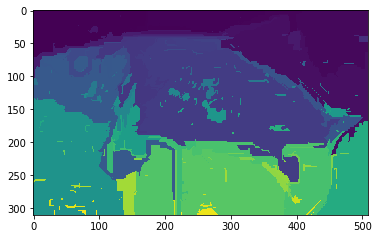

In [135]:
#分割算法
img = cv.imread('2.jpg')
im_mask = skimage.segmentation.felzenszwalb(
    skimage.util.img_as_float(img), 50, 0.9,5)
plt.imshow(im_mask)
plt.show()